# Applying a Linear Model

#### Paulo C. Rios Jr, October 11, 2017

### 1. Import the needed packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

### 2. Graphics

In [4]:
%matplotlib inline
sns.set()

### 3. Read the data

In [5]:
gdp_pc = pd.read_csv("./data/gdp_per_capita.csv", 
                    delimiter = "\t", thousands = ",",
                    encoding = "latin1", na_values = "n/a")

In [6]:
life_sat = pd.read_csv("./data/oecd_bli_2015.csv",
                      thousands = ",")

### 3. Check out what is in the datasets

In [7]:
gdp_pc.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [8]:
life_sat.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [9]:
gdp_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null float64
Estimates Start After            188 non-null float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


In [10]:
life_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
LOCATION                 3292 non-null object
Country                  3292 non-null object
INDICATOR                3292 non-null object
Indicator                3292 non-null object
MEASURE                  3292 non-null object
Measure                  3292 non-null object
INEQUALITY               3292 non-null object
Inequality               3292 non-null object
Unit Code                3292 non-null object
Unit                     3292 non-null object
PowerCode Code           3292 non-null int64
PowerCode                3292 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    3292 non-null float64
Flag Codes               1120 non-null object
Flags                    1120 non-null object
dtypes: float64(3), int64(1), object(13)
memory usage: 437.3+ KB


### 4. Get the columns of interest in the Life Satisfaction Dataset

These are the distinct values for the column INDICATOR

In [11]:
life_sat["INDICATOR"].unique()

array(['HO_BASE', 'HO_HISH', 'HO_NUMR', 'IW_HADI', 'IW_HNFW', 'JE_EMPL',
       'JE_JT', 'JE_LTUR', 'JE_PEARN', 'SC_SNTWS', 'ES_EDUA', 'ES_STCS',
       'ES_EDUEX', 'EQ_AIRP', 'EQ_WATER', 'CG_TRASG', 'CG_VOTO', 'HS_LEB',
       'HS_SFRH', 'SW_LIFS', 'PS_SFRV', 'PS_REPH', 'WL_EWLH', 'WL_TNOW'], dtype=object)

The "SW_LIFS" indicator is the one that corresponds to life satisfaction. The inequality that we seek is the total value of the indicator. That is, we are looking for inequality equal to "TOT".
Let's test this for a country, Australia.

In [12]:
life_sat.shape

(3292, 17)

In [13]:
life_sat[life_sat["INDICATOR"] == "SW_LIFS"].shape

(179, 17)

In [14]:
condition = (life_sat["INDICATOR"] == "SW_LIFS") & (life_sat["LOCATION"] == "AUS") & (life_sat["INEQUALITY"] == "TOT")
life_sat[condition]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN


Let's filter the dataset to get only the columns we want

In [15]:
columns_of_interest = ["Country", "Indicator", "Inequality", "Value"]
life_sat[condition][columns_of_interest]

,Country,Indicator,Inequality,Value
2669,Australia,Life satisfaction,Total,7.3


In [16]:
columns_of_interest = ["Country", "INDICATOR", "INEQUALITY", "Value"]
life_sat[condition][columns_of_interest]

,Country,INDICATOR,INEQUALITY,Value
2669,Australia,SW_LIFS,TOT,7.3


Let's now filter the entire data set to get only the indicator (life satisfaction) and the inequality (total) that we want.

In [17]:
life_sat_condition = (life_sat["INDICATOR"] == "SW_LIFS") &  (life_sat["INEQUALITY"] == "TOT")

In [18]:
columns_of_interest = ["Country", "INDICATOR", "INEQUALITY", "Value"]
life_sat_by_country = life_sat[life_sat_condition][columns_of_interest]

In [19]:
life_sat_by_country.head()

,Country,INDICATOR,INEQUALITY,Value
2669,Australia,SW_LIFS,TOT,7.3
2670,Austria,SW_LIFS,TOT,6.9
2671,Belgium,SW_LIFS,TOT,6.9
2672,Canada,SW_LIFS,TOT,7.3
2673,Czech Republic,SW_LIFS,TOT,6.5


In [20]:
life_sat_by_country.shape

(37, 4)

We have this indicator for only 37 countries, since the OECD collects this data only for these countries

In [21]:
columns_of_interest = ["Country", "INDICATOR", "Value"]
life_sat_by_country = life_sat_by_country[columns_of_interest]

In [22]:
life_sat_by_country.head()

,Country,INDICATOR,Value
2669,Australia,SW_LIFS,7.3
2670,Austria,SW_LIFS,6.9
2671,Belgium,SW_LIFS,6.9
2672,Canada,SW_LIFS,7.3
2673,Czech Republic,SW_LIFS,6.5


### 5. Get the Columns of interest in the GDP dataset

In [23]:
gdp_pc.shape

(190, 7)

We have the GDP for 190 countries

In [24]:
gdp_pc.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [25]:
gdp_pc.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [26]:
condition = gdp_pc["Country"] == "Australia"
gdp_pc[condition] 

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
7,Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0


Let's filter to have only the columns we need.

In [27]:
columns_of_interest = ["Country", "2015"]
gdp_pc[columns_of_interest].head(2)

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383


We will have only these columns.

In [28]:
gdp_by_country = gdp_pc[columns_of_interest]

In [29]:
gdp_by_country.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,3995.383
2,Algeria,4318.135
3,Angola,4100.315
4,Antigua and Barbuda,14414.302


### 6. Merge the two datasets on Country

In [30]:
life_sat_gdp = pd.merge(gdp_by_country, life_sat_by_country,
                        on = "Country" )

In [31]:
life_sat_gdp.head(15)

,Country,2015,INDICATOR,Value
0,Australia,50961.865,SW_LIFS,7.3
1,Austria,43724.031,SW_LIFS,6.9
2,Belgium,40106.632,SW_LIFS,6.9
3,Brazil,8669.998,SW_LIFS,7.0
4,Canada,43331.961,SW_LIFS,7.3
5,Chile,13340.905,SW_LIFS,6.7
6,Czech Republic,17256.918,SW_LIFS,6.5
7,Denmark,52114.165,SW_LIFS,7.5
8,Estonia,17288.083,SW_LIFS,5.6
9,Finland,41973.988,SW_LIFS,7.4


In [32]:
life_sat_gdp.columns

Index(['Country', '2015', 'INDICATOR', 'Value'], dtype='object')

In [33]:
columns_of_interest = ["Country", "2015", "Value"]
life_sat_gdp = life_sat_gdp[columns_of_interest]

In [34]:
life_sat_gdp.head(10)

,Country,2015,Value
0,Australia,50961.865,7.3
1,Austria,43724.031,6.9
2,Belgium,40106.632,6.9
3,Brazil,8669.998,7.0
4,Canada,43331.961,7.3
5,Chile,13340.905,6.7
6,Czech Republic,17256.918,6.5
7,Denmark,52114.165,7.5
8,Estonia,17288.083,5.6
9,Finland,41973.988,7.4


In [35]:
life_sat_gdp.columns = ["Country", "GDP_2015", "Life_Satisfaction"]

In [36]:
life_sat_gdp.head(5)

,Country,GDP_2015,Life_Satisfaction
0,Australia,50961.865,7.3
1,Austria,43724.031,6.9
2,Belgium,40106.632,6.9
3,Brazil,8669.998,7.0
4,Canada,43331.961,7.3


### 7. Visualize the new dataset

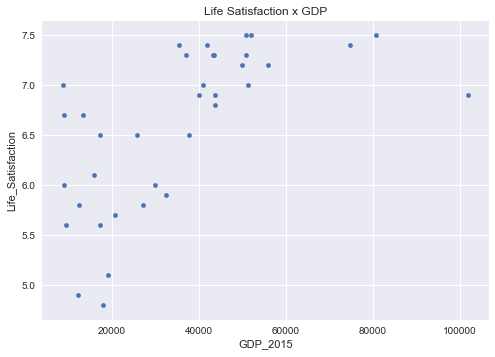

In [37]:
life_sat_gdp.plot(kind = "scatter", 
                  x = "GDP_2015", y = "Life_Satisfaction", 
                  title = "Life Satisfaction x GDP")
plt.show()

### 8. Reshape and Split the Data in Train, Test Sets

In [38]:
# reshape the data for the model
X = np.c_[life_sat_gdp["GDP_2015"]]
y = np.c_[life_sat_gdp["Life_Satisfaction"]]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

### 7. Train a Linear Model 

#### 7.1 Train the Model on the Training Set

In [40]:
# Create an instance of a linear regression model
lr_model = linear_model.LinearRegression()

In [41]:
# train the model
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 7.3 Test the model on the training set

In [42]:
y_train_pred = lr_model.predict(X_train)

In [43]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

0.36156453726229071

In [44]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.48972746757338015

In [45]:
print("Mean Squared Error = %.2f" % mse_train)

Mean Squared Error = 0.36


In [46]:
# Explained variance score, 1 is perfect score
print("Variance score = %.2f" % r2_train)

Variance score = 0.49


#### 7.4 Visualize the Model Fitting on the Training Data

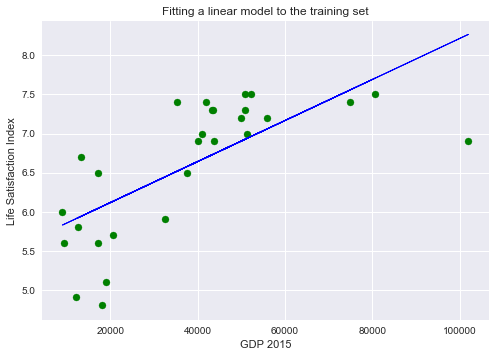

In [47]:
plt.scatter(X_train, y_train, color = "green")
plt.plot(X_train, y_train_pred, color = "blue", linewidth = 1)
plt.title("Fitting a linear model to the training set")
plt.xlabel("GDP 2015")
plt.ylabel("Life Satisfaction Index")
plt.show()

#### 7.5 Make a single prediction

In [48]:
# Make a prediction for Cyprus - find it GDP
condition = gdp_by_country["Country"] == "Brazil"
gdp_by_country[condition]

,Country,2015
22,Brazil,8669.998


In [49]:
X_new = [[22587]]  # Brazil's GDP per capita

In [50]:
print(lr_model.predict(X_new))

[[ 6.18320437]]


#### 7.6 Test the Model on the Test Data

In [51]:
y_test_pred = lr_model.predict(X_test)

In [52]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

0.39544189245928285

In [53]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

-0.65197657424243483

In [54]:
print("Mean Squared Error = %.2f" % mse_test)

Mean Squared Error = 0.40


In [55]:
# Explained variance score, 1 is perfect score
print("Variance score = %.2f" % r2_test)

Variance score = -0.65


#### 7.7. Visualize the Model Fitting on the Test Data

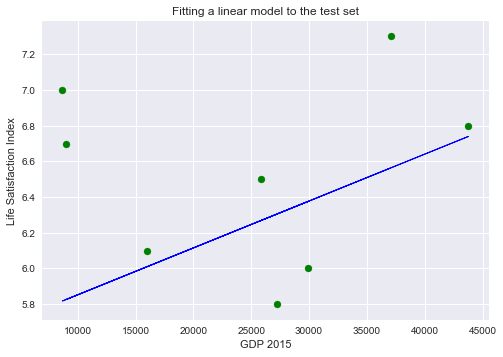

In [56]:
plt.scatter(X_test, y_test, color = "green")
plt.plot(X_test, y_test_pred, color = "blue", linewidth = 1)
plt.title("Fitting a linear model to the test set")
plt.xlabel("GDP 2015")
plt.ylabel("Life Satisfaction Index")
plt.show()

### 8. Conclusion

A linear model is not a good model fit for this dataset. We can clearly visualize that the relationship between X and Y isn't linear.